# [AI-ML: Machine Learning](https://csed.acm.org/final-report/)
## CS Core: Session 2

CS Core Topics

<ul>
    <li style="list-style-type: none;">4. The overfitting problem/controlling solution complexity (regularization, pruning – intuition only)</li>
        <ul>
        	<li style="list-style-type: none;">a. The bias (underfitting) – variance (overfitting) tradeoff</li>
        </ul>
    <li style="list-style-type: none;">7. Machine learning evaluation</li>
        <ul>
	        <li style="list-style-type: none;">a. Separation of train, validation, and test sets</li>
	        <li style="list-style-type: none;">b. Performance metrics for classifiers</li>
	        <li style="list-style-type: none;">c. Estimation of test performance on held-out data</li>
	        <li style="list-style-type: none;">d. Tuning the parameters of a machine learning model with a validation set</li>
	        <li style="list-style-type: none;">e. Importance of understanding what a model is doing, where its pitfalls/shortcomings are, and the implications of its decisions</li>
        <ul>
</ul>

## Overview

Recall that "supervised learning enables the development of predictive models that generalize well to new, unseen instances".  How can one know that one's predictive model generalizes well to new, unseen instances, when we haven't seen them?  One answer has already been part of our practice so far: We deliberately "hold out" a random portion of the data, the *testing set*, from the *training set* so that there is data "unseen" by the model during training.

In this session, we will:
- discuss further separation of data into training, validation, and test sets,
- consider how important both model choice and model parameter ("hyperparameter") choice is to avoid problems of under- and over-fitting the data, and thus
- lay a foundation for responsible machine learning practice that increases confidence that our models will perform as intended.

We will begin by revisiting previously-introduced supervised learning algorithms to illustrate examples of underfitting and overfitting.  

## Linear Regression Underfitting and Polynomial Regression Overfitting

We begin by generating some synthetic data from a simple parabola combined with random noise.  Random noise introduces a type of "irreducible error"; no matter how carefully we select, train, and tune a machine learning model, there will often be factors we cannot explain with our model, whether introduced through measurement error, data entry error, or simply through not having all knowledge that would fully explain the relationship between inputs and outputs.

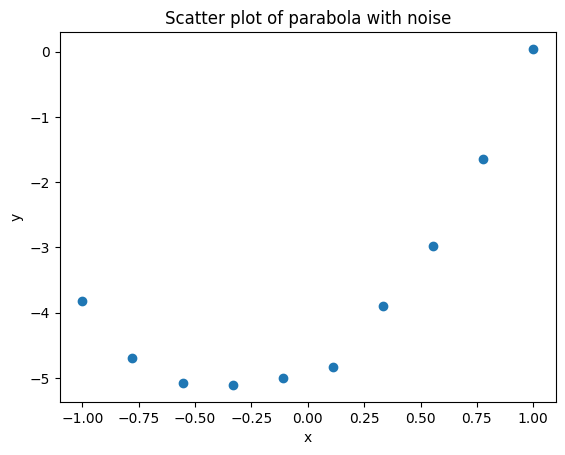

In [43]:
# Generate a dataframe of 10 (x, y) points where y is a polynomial function of x with noise added to it.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate 10 x values from -1 to 1, including -1 and 1
seed = 0
n = 10
min, max = -1, 1
mean, stddev = 0, 0.1
np.random.seed(seed)
x = np.linspace(min, max, n)

# Generate y values using a polynomial function with noise added to it
np.random.seed(seed)
def get_ys(x):
    return 3 * x**2 + 2 * x - 5 + np.random.normal(mean, stddev, len(x))
y = get_ys(x)

# Create a dataframe with x and y values
df = pd.DataFrame({'x': x, 'y': y})

# Plot the data
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of parabola with noise')
plt.show()


We can see the general parabolic ($3 x^2 + 2 x - 5$) shape, but with small Gaussian noise (mean 0, standard deviation 0.1) added.  As one might guess, linear regression is a poor choice for predicting $y$ from $x$. 

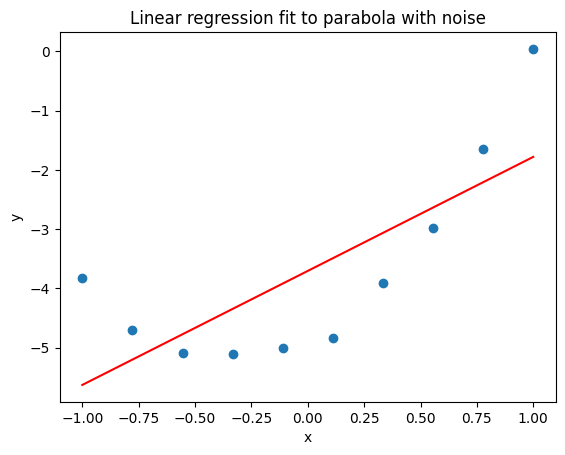

In [44]:
# Fit a linear regression model to the data.
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # Create a linear regression model
model.fit(df[['x']], df['y'])  # Fit the model to the data

# Predict the y values using the model
y_pred = model.predict(df[['x']])
df['y_pred'] = y_pred

# Plot the data and the linear regression line
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression fit to parabola with noise')
plt.show()

This is an example of underfitting.  Not only does it not fit our training data well, but it would not be expected to fit any data from the underlying model.  Next, we observe the fit against 1,000 such data points.

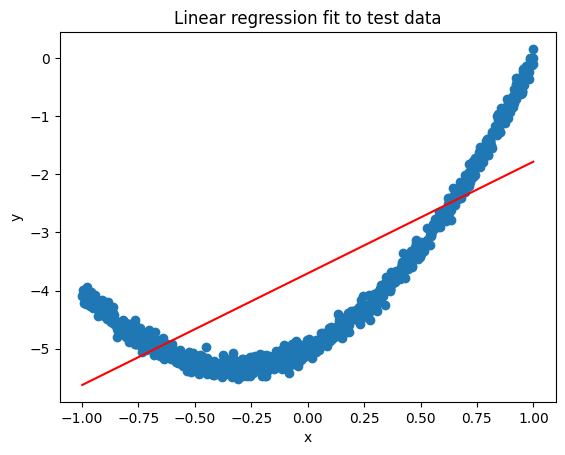

In [45]:
# Generate a test dataframe with 1000 x values from -2 to 2 generated from the same parabolic function with noise.
x_test = np.random.uniform(min, max, 1000)
x_test.sort()
y_test = get_ys(x_test)
df_test = pd.DataFrame({'x': x_test, 'y': y_test})

# Predict the y values for the test data using the linear regression model
y_pred_test = model.predict(df_test[['x']])
df_test['y_pred'] = y_pred_test

# Plot the test data and the linear regression line
plt.scatter(df_test['x'], df_test['y'])
plt.plot(df_test['x'], df_test['y_pred'], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression fit to test data')
plt.show()

But what does it mean to be a good or bad fit?  There can be many different ways to measure error or the explanatory power of a predictive model.  Three popular metrics for evaluating the quality of a regression model are:

1. **[Mean Absolute Error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error)**: MAE measures the *average of the absolute differences between predicted and actual values*. It provides a straightforward interpretation of average error magnitude without giving extra weight to larger errors.

2. **[Mean Squared Error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error)**: This metric calculates the *average of the squared differences between the predicted and actual values*. It penalizes larger errors more heavily, making it sensitive to outliers. **[Root Mean Squared Error (RMSE)](https://en.wikipedia.org/wiki/Root_mean_square_deviation)** is the square root of MSE.

3. **[$R^2$ (Coefficient of Determination)](https://en.wikipedia.org/wiki/Coefficient_of_determination)**: $R^2$ represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where higher values indicate better model performance in explaining the variability of the target variable.  

These are the different error metrics computed for both the 10-point training data and the 1000-point testing data:



In [46]:
print('Training performance metrics:')
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
print(f"     Mean Absolute Error (MAE): {mean_absolute_error(df['y'], df['y_pred']):7.4f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(df['y'], df['y_pred']):7.4f}")
print(f"                     R^2 Score: {r2_score(df['y'], df['y_pred']):7.4f}")

print('\nTest performance metrics:')
print(f"     Mean Absolute Error (MAE): {mean_absolute_error(df_test['y'], df_test['y_pred']):7.4f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(df_test['y'], df_test['y_pred']):7.4f}")
print(f"                     R^2 Score: {r2_score(df_test['y'], df_test['y_pred']):7.4f}")


Training performance metrics:
     Mean Absolute Error (MAE):  0.9385
Root Mean Squared Error (RMSE):  1.0789
                     R^2 Score:  0.5643

Test performance metrics:
     Mean Absolute Error (MAE):  0.8513
Root Mean Squared Error (RMSE):  0.9514
                     R^2 Score:  0.5982


 **[Underfitting](https://en.wikipedia.org/wiki/Overfitting#Underfitting)** occurs when a machine learning model is too simple to capture the underlying patterns in the data, resulting in poor performance on both the training and testing datasets. This typically happens when the model has insufficient complexity, such as having too few parameters or not being expressive enough.

 However, simply opting for a more complex model with more parameters can cause a different kind of problem.  Next we take the original 10 data points and seek to fit a 9-degree polynomial to them.  The $R^2$ score is only valid for linear regression, so we omit as a metric below.

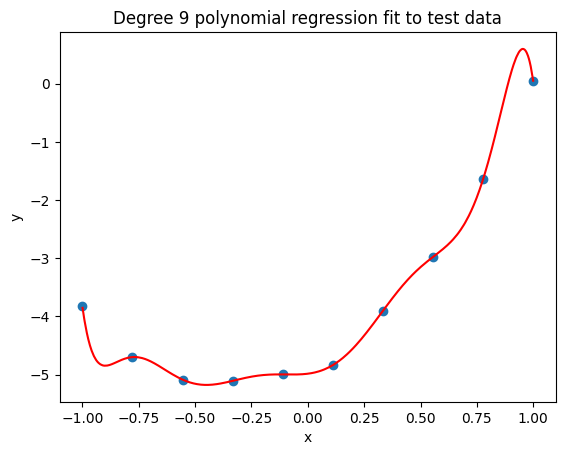

Training performance metrics:
     Mean Absolute Error (MAE):  0.0000
Root Mean Squared Error (RMSE):  0.0000


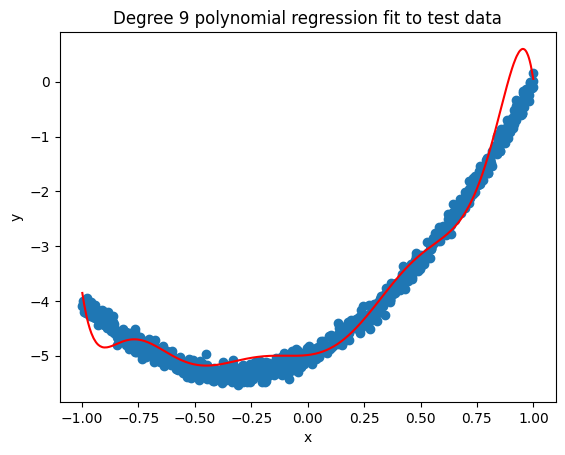


Test performance metrics:
     Mean Absolute Error (MAE):  0.2258
Root Mean Squared Error (RMSE):  0.3230


In [47]:
# Fit a degree 9 polynomial regression model to the data.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=9)  # Create a polynomial features object
X_poly = poly_features.fit_transform(df[['x']])  # Transform the x values to polynomial features
model_poly = LinearRegression()  # Create a linear regression model
model_poly.fit(X_poly, df['y'])  # Fit the model to the data
y_pred_poly = model_poly.predict(X_poly)  # Predict the y values using the polynomial regression model
df['y_pred_poly'] = y_pred_poly

# Predict the y values using the polynomial regression model for 1000 test x values
X_test_poly = poly_features.transform(df_test[['x']])  # Transform the test x values to polynomial features
y_test_pred_poly = model_poly.predict(X_test_poly)
df_test['y_test_pred_poly'] = y_test_pred_poly

# Plot the 10-point data and the polynomial regression line
plt.scatter(df['x'], df['y'])
plt.plot(df_test['x'], df_test['y_test_pred_poly'], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Degree 9 polynomial regression fit to test data')
plt.show()

print('Training performance metrics:')
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
print(f"     Mean Absolute Error (MAE): {mean_absolute_error(df['y'], df['y_pred_poly']):7.4f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(df['y'], df['y_pred_poly']):7.4f}")

# Plot the test data and the polynomial regression line
plt.scatter(df_test['x'], df_test['y'])
plt.plot(df_test['x'], df_test['y_test_pred_poly'], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Degree 9 polynomial regression fit to test data')
plt.show()

print('\nTest performance metrics:')
print(f"     Mean Absolute Error (MAE): {mean_absolute_error(df_test['y'], df_test['y_test_pred_poly']):7.4f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(df_test['y'], df_test['y_test_pred_poly']):7.4f}")

Note that although there is a perfect fit of the degree-9 polynomial to the 10 points, yet the predicted curve does not generalize well to the underlying noisy parabola.  This is an example of *overfitting*.  **[Overfitting](https://en.wikipedia.org/wiki/Overfitting)** occurs when a machine learning model learns the training data too well, capturing noise and outliers instead of the underlying patterns, which results in excellent performance on the training set but poor generalization to unseen data. This typically happens when the model is too complex relative to the amount of training data.

Watch what happens with the train and test RMSE when we vary the degree of the polynomial from 1 (linear) up to 9:

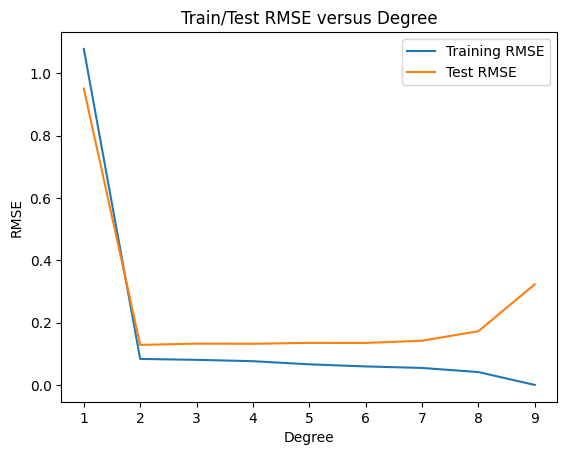

In [48]:
def get_RMSEs(df_train, df_test, degree):
    poly_features = PolynomialFeatures(degree=degree)  # Create a polynomial features object
    X_poly = poly_features.fit_transform(df_train[['x']])  # Transform the x values to polynomial features
    model_poly = LinearRegression()  # Create a linear regression model
    model_poly.fit(X_poly, df_train['y'])  # Fit the model to the data
    y_pred_poly = model_poly.predict(X_poly)  # Predict the y values using the polynomial regression model
    df_train['y_pred_poly'] = y_pred_poly

    # Predict the y values using the polynomial regression model for 1000 test x values
    X_test_poly = poly_features.transform(df_test[['x']])  # Transform the test x values to polynomial features
    y_test_pred_poly = model_poly.predict(X_test_poly)
    df_test['y_test_pred_poly'] = y_test_pred_poly

    return root_mean_squared_error(df_train['y'], df_train['y_pred_poly']), root_mean_squared_error(df_test['y'], df_test['y_test_pred_poly'])

degrees = range(1, 10)
train_RMSEs = []
test_RMSEs = []
for degree in degrees:
    train_RMSE, test_RMSE = get_RMSEs(df, df_test, degree)
    train_RMSEs.append(train_RMSE)
    test_RMSEs.append(test_RMSE)

plt.plot(degrees, train_RMSEs, label='Training RMSE')
plt.plot(degrees, test_RMSEs, label='Test RMSE')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('Train/Test RMSE versus Degree')
plt.legend()
plt.show()


Our degree 1 (linear) model yield us the highest RSME for both training and testing data as we underfit.  Our degree 2 (parabolic) model yields the lowest test RMSE, i.e. is most generalizable in prediction quality, which we would expect given that the underlying data is a noisy parabola.  For higher degrees, we overfit.  With increasing parameter, we get an ever closer fit to our training points, yet this fit is to the noise, not the underlying distribution, so the training RSME gets better (lower) as the testing RSME gets worse (higher).

While this simple example allows us to see under- and over-fitting, comparing error metrics such as RMSE on training versus testing predictions is a technique for discerning over-/under-fitting that serves well for *high-dimensional data* that would be difficult or impossible to effectively visualize.  This under- and -overfitting phenomenon can be observed with many types of models, e.g. $k$-Nearest Neighbor classification as we vary $k$, or Decision Trees as we vary the maximum depth.  This recurring tension between underfitting and overfitting is called the *bias-variance tradeoff*.

## Bias-Variance Tradeoff

The **[bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)** is the conflict between minimizing two sources of predictive model error:
- **[bias](https://en.wikipedia.org/wiki/Bias_(machine_learning))**, error from the inadequacy of the predictive function that is chosen for the predictive model, and
- **[variance](https://en.wikipedia.org/wiki/Variance_(statistics))**, error introduced by the model's sensitivity to small fluctuations in the training data.

Linear regression exhibited high bias for our nonlinear data.  A degree 9 polynomial could vary its excessive parameters to perfectly fit the data, while also varying the prediction curve between those points to predictions well outside the noisy distribution.  **Model complexity** plays a significant role in this tradeoff: simpler models tend to have higher bias and lower variance, while more complex models tend to have lower bias and higher variance.   

## Regularization

[Regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)) is the adding of terms to a loss function that penalize model attributes that lead to overfitting, such as model coefficients that grow too large.  One way to think about regularization is that it penalizes large parameters, and rewards a model with lower (or zero) coefficient model that achieves a similar performance.  For example, **[Lasso Regularization](https://en.wikipedia.org/wiki/Lasso_(statistics))** (a.k.a. "LASSO", Least Absolute Shrinkage and Selection Operator) is a linear regression technique that adds a penalty equal to the absolute value of the coefficients, encouraging sparsity in the model by shrinking less important feature weights to zero and thus helping to prevent overfitting.  We demonstrate it here with our degree 9 polynomial model.

(10, 4)


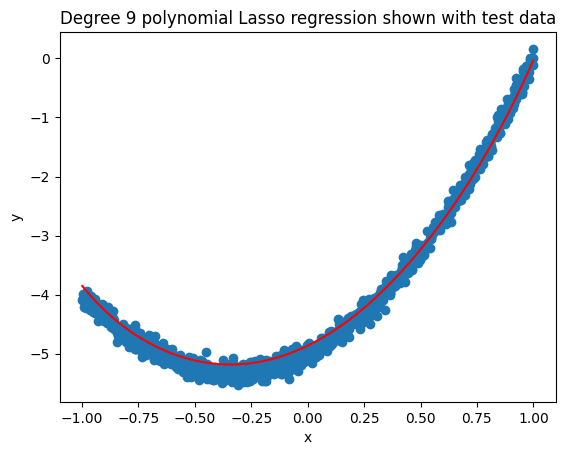

Training performance metrics:
     Mean Absolute Error (MAE):  0.0000
Root Mean Squared Error (RMSE):  0.0000

Test performance metrics:
     Mean Absolute Error (MAE):  0.1178
Root Mean Squared Error (RMSE):  0.1421

Coefficients: [0.         1.87083742 2.75080986 0.03878037 0.         0.
 0.07777221 0.         0.09640403 0.        ]
Intercept: -4.8661930892278225


In [49]:
poly_features = PolynomialFeatures(degree=degree)  # Create a polynomial features object
X_poly = poly_features.fit_transform(df[['x']])  # Transform the x values to polynomial features
from sklearn.linear_model import Lasso
model_poly = Lasso(alpha=0.01)  # Create a linear regression model with lasso regularization
model_poly.fit(X_poly, df['y'])  # Fit the model to the data
print(df.shape)

# Predict the y values using the polynomial regression model for 1000 test x values
X_test_poly = poly_features.transform(df_test[['x']])  # Transform the test x values to polynomial features
y_test_pred_poly = model_poly.predict(X_test_poly)
df_test['y_test_pred_poly'] = y_test_pred_poly

# Plot the test data and the polynomial regression line
plt.scatter(df_test['x'], df_test['y'])
plt.plot(df_test['x'], df_test['y_test_pred_poly'], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Degree 9 polynomial Lasso regression shown with test data')
plt.show()

print('Training performance metrics:')
print(f"     Mean Absolute Error (MAE): {mean_absolute_error(df['y'], df['y_pred_poly']):7.4f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(df['y'], df['y_pred_poly']):7.4f}")

print('\nTest performance metrics:')
print(f"     Mean Absolute Error (MAE): {mean_absolute_error(df_test['y'], df_test['y_test_pred_poly']):7.4f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(df_test['y'], df_test['y_test_pred_poly']):7.4f}")

# Print the coefficients and intercept of the polynomial regression model
print('\nCoefficients:', model_poly.coef_)
print('Intercept:', model_poly.intercept_)

Although this is fit to the same noisy 10 points as our 9-degree polynomial above, we can see how penalizing the magnitude of the coefficients not only gives us a much smoother model that better generalizes to the 1000 point test dataset, but as we look at the coefficients, we see that the most significant terms of $3 x^2 + 2 x - 5$ underlying the noise are seen in the lasso coefficients as approximately $2.75 x^2 + 1.87 x - 4.87$ - not a bad approximation for 10 noisy points!  All of the other coefficients are smaller magnitudes or zero.  Thus, we demonstrate how *regularization*, penalizing model complexity through a loss function, is an effective way to balance bias and variance.

## Decision Tree Overfitting and Underfitting

We now revisit our previous Decision Tree Palmer Penguin classification example and observe what occurs when we vary the maximum tree depth of the trained model.  

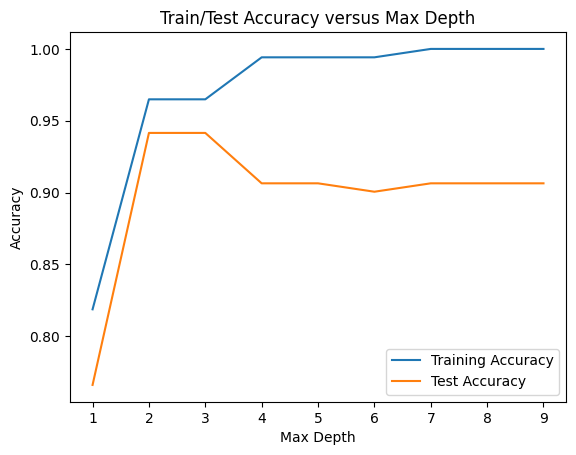

In [50]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# import decision tree classifier, accuracy score and confusion matrix
penguins = sns.load_dataset('penguins')
# Drop all columns except bill_length_mm, flipper_length_mm, and species. Drop all rows with missing values.
penguins = penguins[['bill_length_mm', 'flipper_length_mm', 'species']]
penguins = penguins.dropna()
 
# Shuffle the dataset rows with the given seed (0).
penguins = penguins.sample(frac=1, random_state=0).reset_index(drop=True)

# Split it into equal training and testing sets using random_state=0.
penguins_train, penguins_test = train_test_split(penguins, test_size=0.5, random_state=0)

# Divide the training and testing sets into input features and output labels.
X_train = penguins_train.drop(columns='species')
y_train = penguins_train['species']
X_test = penguins_test.drop(columns='species')
y_test = penguins_test['species']

# Collect training and testing accuracies for decision tree classifiers with max_depths from 1 to 9.
max_depths = np.arange(1, 10)
train_accuracies = []
test_accuracies = []
for max_depth in np.arange(1, 10):
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracies.append(accuracy_score(y_train, y_pred_train))
    test_accuracies.append(accuracy_score(y_test, y_pred_test))

# Plot the training and testing accuracies versus max_depth.
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train/Test Accuracy versus Max Depth')
plt.legend()
plt.show()



Above, we have used *accuracy* (defined below) as our performance metric we seek to maximize.  We can see that training accuracy increases with increasing maximum depth of the decision tree, but a maximum depth of 2 or 3 generalizes best.  Depth 1 underfits, depths $\geq4$ overfit, and depths 2 and 3 balance our bias-variance tradeoff in this case.

Classification uses different performance metrics than Regression.  Here is a brief description of some popular choices:

- **[Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#Classification_accuracy)**: Accuracy is defined as the ratio of correctly predicted instances to the total number of instances. Accuracy provides a straightforward measure of overall model performance. However, it may be misleading in cases of class imbalance, where some classes are more frequent than others, potentially masking poor performance on minority classes.

- **[Precision](https://en.wikipedia.org/wiki/Precision_and_recall#Multi-class_evaluation)**: Precision for class $k$ is defined as the number of correct predictions of class $k$ divided by the total number of class $k$ predictions (i.e. the classifier bias).  Precision assesses how many of the instances predicted as class $k$ are actually of class $k$.  To aggregate precision across all classes, **Macro-Averaged Precision** (unweighted average of precisions for each class) and **Weighted-Averaged Precision** (average of precisions weighted by the number of true instances for each class) are commonly used. Precision is particularly important in scenarios where the cost of false positives is high.
- **[Recall](https://en.wikipedia.org/wiki/Precision_and_recall#Multi-class_evaluation)**: Also known as **Sensitivity**, recall for class $k$ is defined as the number of correct predictions of class $k$ divided by the number of class $k$ instances in the sample.  It measures the ability of the model to correctly identify all instances of a particular class.  To aggregate recall across all classes, **Macro-Averaged Recall** (unweighted average of recalls for each class) and **Weighted-Averaged Recall** (average of recalls weighted by the number of true instances for each class) are commonly used. Recall is particularly important in scenarios where missing a class (false negatives) has significant consequences.

- **[F1-Score](https://en.wikipedia.org/wiki/F1_score#Multiclass)**: The F1-Score is the harmonic mean of precision and recall, providing a balance between the two metrics. In multiclass classification, the F1-Score can be calculated for each class and then averaged using either **Macro-Averaging** or **Weighted-Averaging**:
   
   $$
   F1_k = 2 \times \frac{\text{Precision}_k \times \text{Recall}_k}{\text{Precision}_k + \text{Recall}_k}
   $$
   
   $$
   \text{Macro F1} = \frac{1}{K} \sum_{k=1}^{K} F1_k
   $$
   
   $$
   \text{Weighted F1} = \sum_{k=1}^{K} \left( \frac{n_k}{N} \times F1_k \right)
   $$
   
   where:
   - $K$ is the number of classes,
   - $n_k$ is the number of true instances for class $k$,
   - $N$ is the total number of instances.
   
   The F1-Score is especially useful when you need a single metric that balances both precision and recall, and it is effective in evaluating models on imbalanced datasets.

## Train, Validation, and Test Sets

Some supervised learning model have parameters that adjust modeling behavior, complexity, etc.  For example, we might vary the **degree** of the polynomial in as a parameter for polynomial regression.  However, models also *learn* parameters for prediction, e.g. the **coefficients** and **intercept** of a polynomial regression.  So as not to confuse the parameters that define the model with the parameters learned by the model, we refer to the parameters that define the model as **hyperparameters**, whereas parameters learned by the model for prediction are just simply called "parameters".  For polynomial regression, the degree of the polynomial being learned is a hyperparameter, whereas learned coefficients and intercept are parameters.

Thus far, we've looked at models where we have varied only a single hyperparameter: polynomial degree in polynomial regression, number of neighbors $k$ in $k$-Nearest Neighbor classification, number of clusters $k$ in $k$-Means clustering, maximum depth in Decision Tree classification.  However, models can have many different hyperparameters, and one can seek to optimize those hyperparameter choices to best effect for bias-variance tradeoff.

Here's the problem: When we have a feedback loop where we are repeatedly training models on training data, testing those models on testing data, and adjusting hyperparameters, there is a risk that we overfit those hyperparameters to our testing data through such repeated feedback, which is a type of "leakage".  **Leakage** in machine learning refers to the unintended inclusion of information from outside the training dataset into the model training process. This can lead to overly optimistic performance metrics and poor generalization to new, unseen data.

For this reason, machine learning processes that optimize hyperparameters often divide data instances into a third **validation** category.  Here is an outline of the workflow:

- Divide data into train, validation, and test sets.
- Loop:
  - Train a model on the *train* data.
  - Test the model with the *validation* data.
  - Choose a different set of hyperparameters.
- Choose a best model from among all models trained.
- Test the best model using the *test* data.

In this way, the *test* data is only used once at the end of the process to see what our expectation of generalized performance would be.  If this is significantly different than the *validation* data performance for the model, this can be an indication of "leakage".

We now demonstrate this process using the **[California Housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)** dataset. 
This dataset contains approximately 20,000 samples of California districts with input features being median income, median house age, average rooms, average bedrooms, population, average household members, district longitude, and district latitude, with a target output of median house value.  We will use a  **Decision Tree Regressor** and tune (i.e. optimize) hyperparameters such as the maximum depth of the tree, the minimum number of samples required to split a node. 

In [51]:
# Load the California housing dataset 
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target

# Split the data into 72% training, 18% validation, and 10% testing sets.
pct_train = 0.72
pct_val = 0.18
pct_test = 0.10
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=pct_test, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=pct_val/(1 - pct_test), random_state=0)

# Find the lowest RMSE DecisionTreeRegressor for max_depths from 5 to 20, and minimum samples to split in [10, 20, 50, 100, 200, 500].
best_model = None
best_RMSE = float('inf')
from sklearn.tree import DecisionTreeRegressor
for max_depth in np.arange(5, 21):
    for min_samples_split in [10, 20, 50, 100, 200, 500]:
        model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        if (rmse < best_RMSE):
            best_model = model
            best_RMSE = rmse
        #print(f"max_depth={max_depth}, min_samples_split={min_samples_split}, RMSE={rmse:7.4f}")

# Print the best model's hyperparameters:
print('Best model hyperparameters:')
print(f"  max_depth: {best_model.get_params()['max_depth']}")
print(f"  min_samples_split: {best_model.get_params()['min_samples_split']}")

# Print the best model's RMSE on the train set, the validation set, and the test set
y_pred_train = best_model.predict(X_train)
y_pred_val = best_model.predict(X_val)
y_pred_test = best_model.predict(X_test)
print('Best model RMSE by dataset:')
print(f"       Train: {root_mean_squared_error(y_train, y_pred_train):7.4f}")
print(f"  Validation: {root_mean_squared_error(y_val, y_pred_val):7.4f}")
print(f"        Test: {root_mean_squared_error(y_test, y_pred_test):7.4f}")

Best model hyperparameters:
  max_depth: 14
  min_samples_split: 100
Best model RMSE by dataset:
       Train:  0.5252
  Validation:  0.6123
        Test:  0.6198


### Testing and Validation with $k$-Fold Cross Validation

Unlike our above approach of splitting the dataset into train, validation, and test sets, users of the Python [**Scikit-Learn**](https://scikit-learn.org/stable/index.html) package often perform a training-test split and then execute a grid search over models with allowable hyperparameters using **[k-fold cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation)**. 

In **[k-fold cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation)** the dataset is partitioned into $k$ equal-sized folds. The model is trained on $k-1$ folds and validated on the remaining fold. This process is repeated $k$ times, with each fold serving as the validation set once. The results from each iteration are then averaged to provide an overall performance metric.  In contrast to our previous method, for a given set of hyperparameters, we train $k$ models with $\frac{k-1}{k}$ of the data and validate with $\frac{1}{k}$ of the data.  By iterating validation folds, we trade off additional time training and validating additional models to get a better sense of generalizability.  The choice of $k=10$ is common, but the default for the Scikit-Learn implementation is currently 5.

Combined with an automated hyperparameter grid search, we demonstrate a different approach to the same problem above an automated grid search of hyperparameters using 5-fold cross validation. 

In [52]:
# Split the California housing data into 90% training and 10% testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Find the best hyperparameters for a DecisionTreeRegressor using GridSearchCV with 5-fold cross-validation.
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': np.arange(5, 21),
    'min_samples_split': [10, 20, 50, 100, 200, 500]
}
model = DecisionTreeRegressor(random_state=0)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print('Best hyperparameters found by GridSearchCV:')
print(f"  max_depth: {grid_search.best_params_['max_depth']}")
print(f"  min_samples_split: {grid_search.best_params_['min_samples_split']}")

# Print the RMSE of the best model along with the RMSE of the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
print('Best model RMSE by dataset:')
print(f"  Train (k-fold CV): {-grid_search.best_score_:7.4f}")
print(f"               Test: {root_mean_squared_error(y_test, y_pred_test):7.4f}")



Best hyperparameters found by GridSearchCV:
  max_depth: 18
  min_samples_split: 100
Best model RMSE by dataset:
  Train (k-fold CV):  0.6216
               Test:  0.6408


Tuning hyperparameters above is a type of "pre-pruning" in decision trees to limit model complexity and prevent overfitting.  It is also possible to "post-prune" a learned decision tree to remove nodes in order to reduce overfitting.  For example, Decision Tree classifiers in Scikit-Learn can use [Cost Complexity Pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html). 

In this session, we have focused on the avoidance of underfitting (bias) and overfitting (variance) to find methods that balance model complexity for better generalizability.  However, this is just one consideration of ML model evaluation.  It is important to understand *what the model has learned* to the best of our ability.  Accuracy, RMSE and other performance metrics don't give a sense of *what* has been learned.  Visualizations such as we have employed above work well for low-dimensional problems, yet many practical ML applications are high-dimensional and many models are difficult to explain.  In general, high-bias, low-variance models, such as linear regression or shallow decision trees, are more easily explainable, whereas low-bias, high-variance models such as popularly used deep neural networks can tend to be "black boxes" that are difficult to test and understand.

## Amazon's Biased AI Recruiting Tool: A Lesson in Machine Learning Pitfalls

A compelling example illustrating the importance of understanding machine learning models and their potential pitfalls is the case of **Amazon's AI-powered recruiting tool** that exhibited gender bias. In 2014, Amazon developed an internal tool to automate the resume screening process, aiming to identify top talent more efficiently. However, by 2015, the company realized that the system was not gender-neutral. The AI model was trained on resumes submitted over a 10-year period, predominantly from male candidates, reflecting the male-dominated. Consequently, the model learned to penalize resumes that included the word "women" (e.g., "women's chess club captain") and downgraded graduates from two women's colleges. This bias arose because the algorithm was trained on historical data that contained implicit gender biases, leading it to favor male candidates over female ones.

Recognizing the issue, Amazon attempted to adjust the tool to be neutral to these terms, but there was no guarantee that the AI would not find other ways to discriminate against female candidates. Eventually, Amazon discontinued the use of the AI recruiting tool. This case underscores the critical need for transparency, fairness, and careful examination of machine learning models, especially in high-stakes applications like hiring, where biased decisions can perpetuate discrimination and inequality. It highlights how training data reflecting historical biases can lead to models that discriminate, emphasizing the responsibility of organizations to ensure their AI systems promote fairness and inclusivity.

**Source:**

- Dastin, J. (2018). [*Amazon scraps secret AI recruiting tool that showed bias against women*](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight-idUSKCN1MK08G). Reuters.

### Additional Reading
- Bolukbasi, T., Chang, K.-W., Zou, J., Saligrama, V., & Kalai, A. (2016). [*Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings*](https://dl.acm.org/doi/10.5555/3157382.3157584). [Arxiv Paper](https://arxiv.org/abs/1607.06520)
- Caliskan, A., Bryson, J. J., & Narayanan, A. (2017). *Semantics derived automatically from language corpora contain human-like biases*. *Science*, 356(6334), 183-186. [DOI: 10.1126/science.aal4230](https://www.science.org/doi/10.1126/science.aal4230)
- [**Wikipedia - Ethics of artificial intelligence**](https://en.wikipedia.org/wiki/Ethics_of_artificial_intelligence)
- [**IBM - AI Fairness 360**](https://aif360.res.ibm.com/) - an extensible open source toolkit to examine, report, and mitigate discrimination and bias in machine learning models.


## Summary

<ul>
  <li><a href="https://en.wikipedia.org/wiki/Overfitting#Underfitting">Underfitting</a> occurs when a machine learning model is too simple to capture the underlying patterns in the data, resulting in poor performance on both the training and testing datasets.</li>
  <li><a href="https://en.wikipedia.org/wiki/Overfitting">Overfitting</a> occurs when a machine learning model learns the training data too well, capturing noise and outliers instead of the underlying patterns, which results in excellent performance on the training set but poor generalization to unseen data.</li>
  <li>The <a href="https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff">Bias-Variance Tradeoff</a> is the conflict between minimizing two sources of predictive model error:
    <ul>
      <li><a href="https://en.wikipedia.org/wiki/Bias_(machine_learning)">bias</a>, error from the inadequacy of the predictive function that is chosen for the predictive model, and</li>
      <li><a href="https://en.wikipedia.org/wiki/Variance_(statistics)">variance</a>, error introduced by the model's sensitivity to small fluctuations in the training data.</li>
    </ul>
  </li>
  <li>Bias and variance are often traded off by:
    <ul>
      <li>Observing which model complexity settings best predict held-out testing data</li>
      <li>Penalizing model complexity via the loss/performance metric</li>
    </ul>
  </li>
  <li>Common performance measures:
    <ul>
      <li>Regression: mean absolute error, mean squared error, root mean squared error, R squared (coefficient of determination; linear regression only)</li>
      <li>Classification: accuracy, precision, recall, F1 score</li>
    </ul>
  </li>
  <li>With significant tuning of model hyperparameters, partition the data into train/validation/test sets.  Iteratively train different hyperparameter models with the train set while measuring generalizable performance with the validation set.  Finally, test the best hyperparameter model with the test set.</li>
  <li>It's important to understand what one's model has learned in order to guard against biased ML models.</li>
</ul>

## Licensing and Attribution

Author: [Todd W. Neller](http://cs.gettysburg.edu/~tneller) aided by ChatGPT o1-preview and GitHub Copilot

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).